In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import datasets
dataset=pd.read_csv('c:\petrol_consumption.csv')


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\88697\AppData\Local\Temp\ipykernel_13700\17971120.py:5: SyntaxWarning: invalid escape sequence '\p'
  dataset=pd.read_csv('c:\petrol_consumption.csv')


In [4]:
dataset
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
X=pd.DataFrame(dataset.iloc[:,:-1])
y=pd.DataFrame(dataset.iloc[:,-1])

In [6]:
X.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
43,7.0,3745,2611,0.508
44,6.0,5215,2302,0.672
45,9.0,4476,3942,0.571
46,7.0,4296,4083,0.623
47,7.0,5002,9794,0.593


In [7]:
y.tail()

,Petrol_Consumption
43,591
44,782
45,510
46,610
47,524


In [8]:
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1, max_depth=4)
classifier.fit(X_train, y_train)

C:\Users\88697\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=4, n_estimators=20, random_state=1)

In [10]:
y_pred=classifier.predict(X_test)

In [11]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

In [12]:
import pandas as pd
feature_imp=pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

Average_income                  0.313051
Population_Driver_licence(%)    0.301293
Paved_Highways                  0.272553
Petrol_tax                      0.113103
dtype: float64

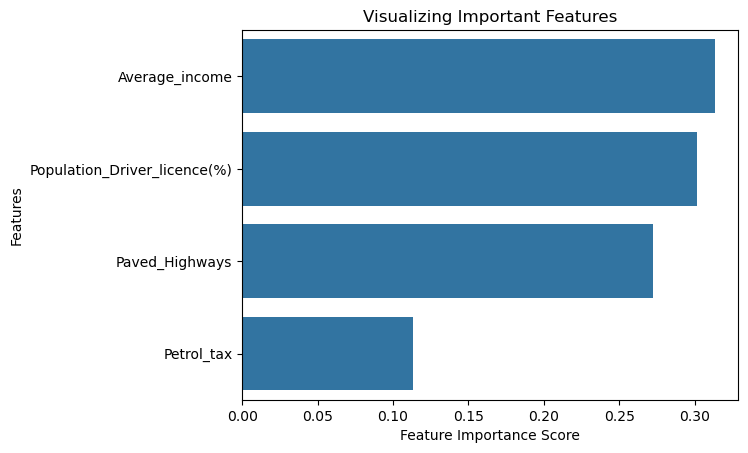

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2), "%")

C:\Users\88697\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


100.0 %


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 109.0
Mean Squared Error: 23755.6
Root Mean Squared Error: 154.1285178025144


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2), "%")

28.95 %


C:\Users\88697\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 187.8
Mean Squared Error: 52963.2
Root Mean Squared Error: 230.13735029325423


In [20]:
from sklearn.svm import SVC, LinearSVC

In [21]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2), "%")

7.89 %


C:\Users\88697\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\88697\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\88697\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 95.4
Mean Squared Error: 19589.2
Root Mean Squared Error: 139.9614232565531


In [23]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

In [24]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)


print(round(acc_sgd,2), "%")

5.26 %


C:\Users\88697\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 195.6
Mean Squared Error: 53307.2
Root Mean Squared Error: 230.8835204166811


In [26]:
from sklearn.linear_model import Perceptron

In [27]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2), "%")

2.63 %


C:\Users\88697\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\88697\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 112.2
Mean Squared Error: 26451.0
Root Mean Squared Error: 162.6376340211576


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2), "%")

C:\Users\88697\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.95 %


C:\Users\88697\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 167.6
Mean Squared Error: 47598.4
Root Mean Squared Error: 218.17057546791227


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2), "%")

100.0 %


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 87.7
Mean Squared Error: 10943.3
Root Mean Squared Error: 104.61022894535697


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
# Gaussian Naive Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)

y_pred = gaussian.predict(y_test)

acc_gaussian = round(gaussian.score(X_train,y_train) * 100, 2)
print(round(acc_gaussian,2), "%")

C:\Users\88697\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Petrol_Consumption
Feature names seen at fit time, yet now missing:
- Average_income
- Paved_Highways
- Petrol_tax
- Population_Driver_licence(%)


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)

result_df.head(8)

In [ ]:
bestmodelgraph = result_df.head(8)
ax = sns.factorplot("Model", y="Score", data=bestmodelgraph,
                palette='Blues_d',aspect=3.2,kind='bar')

In [ ]:
# data: 
# https://github.com/ShauryaBhandari/Machine-Learning/blob/master/Random%20Forest/petrol_consumption.csv


# data: (transfer data from cancer.data.csv to cancer.data1.csv with fewer column)
# https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv

# code:
# https://intellipaat.com/blog/what-is-random-forest-algorithm-in-python/
# https://www.kaggle.com/chenfafa/predictive-model-90-accuracy-titanic/edit